# Heart Disease Prediction Model

## Load the dataset

Importing standard modules.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #ignore warning to imporve readability
pd.set_option("display.max_columns", 300) #make every column visible

The dataset was obtained from UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/heart+disease

In [2]:
df = pd.read_csv('Datasets/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Below are the description of the each features of the dataset according to UCI Machine Learning Repository:
- age: age in years
- sex: sex (1 = male; 0 = female)
- cp: chest pain type
    - Value 0: No chest pain
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: diagnosis of heart disease (1 = yes; 0 = no)

In [3]:
df.shape

(303, 14)

We can see that there are 303 instances which is considered quite few of them.

## Feature Selection

Since we are trying to predict whether a person have heart disease or not without having to go to the hospital, we will select those features or information which can be easily excessable. Other features that required equitment from hospital to get an accurate measures will not be selected. 

In [4]:
selected_features = ['age','sex','cp','trestbps','thalach','exang','target']
df.drop(df.columns.difference(selected_features), 1, inplace=True)
df.head()

,age,sex,cp,trestbps,thalach,exang,target
0,63,1,3,145,150,0,1
1,37,1,2,130,187,0,1
2,41,0,1,130,172,0,1
3,56,1,1,120,178,0,1
4,57,0,0,120,163,1,1


## Data Cleaning

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
thalach     0
exang       0
target      0
dtype: int64

Nice, there is no null values in this dataset.

## Exploratory Data Analysis (EDA)

In [6]:
df.dtypes

age         int64
sex         int64
cp          int64
trestbps    int64
thalach     int64
exang       int64
target      int64
dtype: object

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
thalach     0
exang       0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,thalach,exang,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,149.646865,0.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,22.905161,0.469794,0.498835
min,29.000000,0.000000,0.000000,94.000000,71.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,133.500000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,153.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,166.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,202.000000,1.000000,1.000000


### Label: Target

In [9]:
df['target'].value_counts(normalize = True)

1    0.544554
0    0.455446
Name: target, dtype: float64

<AxesSubplot:xlabel='target', ylabel='count'>

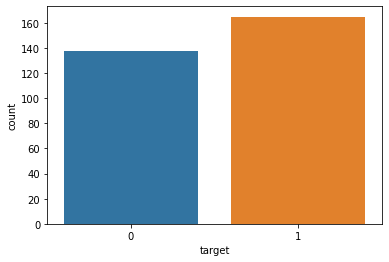

In [10]:
sns.countplot(df['target'])

Let's have a look at the overall distribution.

a) For Numeric Data
- Made histograms to understand distributions
- Corrplot
- Pivot table comparing survival rate across numeric variables

b) For Categorical Data

- Made bar charts to understand balance of classes
- Made pivot tables to understand relationship with survival

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'thalach', 'exang', 'target'], dtype='object')

In [12]:
df_num = df[['age','trestbps','thalach']]
df_cat = df[['sex','cp','exang']]

### Numeric Data

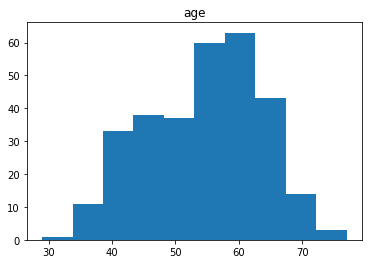

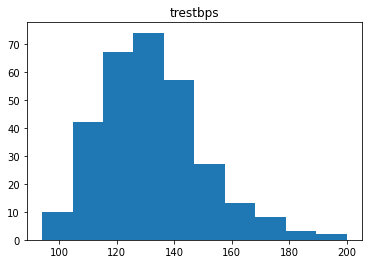

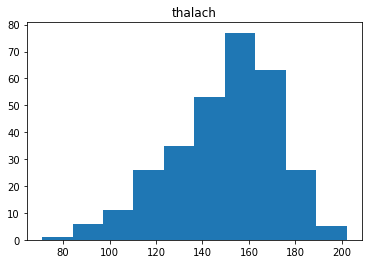

In [13]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

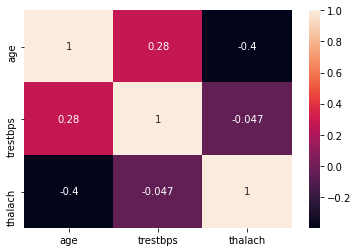

In [14]:
sns.heatmap(df_num.corr(), annot=True)

In [15]:
pd.pivot_table(df, index = 'target', values = df_num.columns)

,age,thalach,trestbps
target,,,
0,56.601449,139.101449,134.398551
1,52.496970,158.466667,129.303030


### Categorical Data

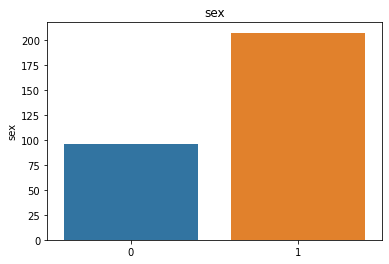

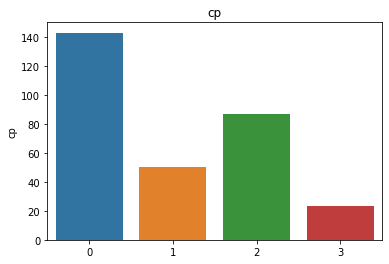

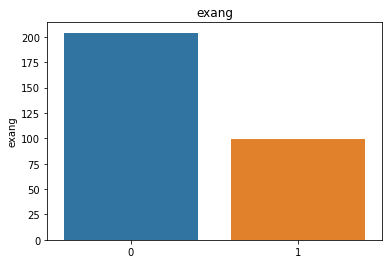

In [16]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [17]:
pd.pivot_table(df, index = 'target', values = df_cat.columns)

,cp,exang,sex
target,,,
0,0.478261,0.550725,0.826087
1,1.375758,0.139394,0.563636


### Overall distribution of the data

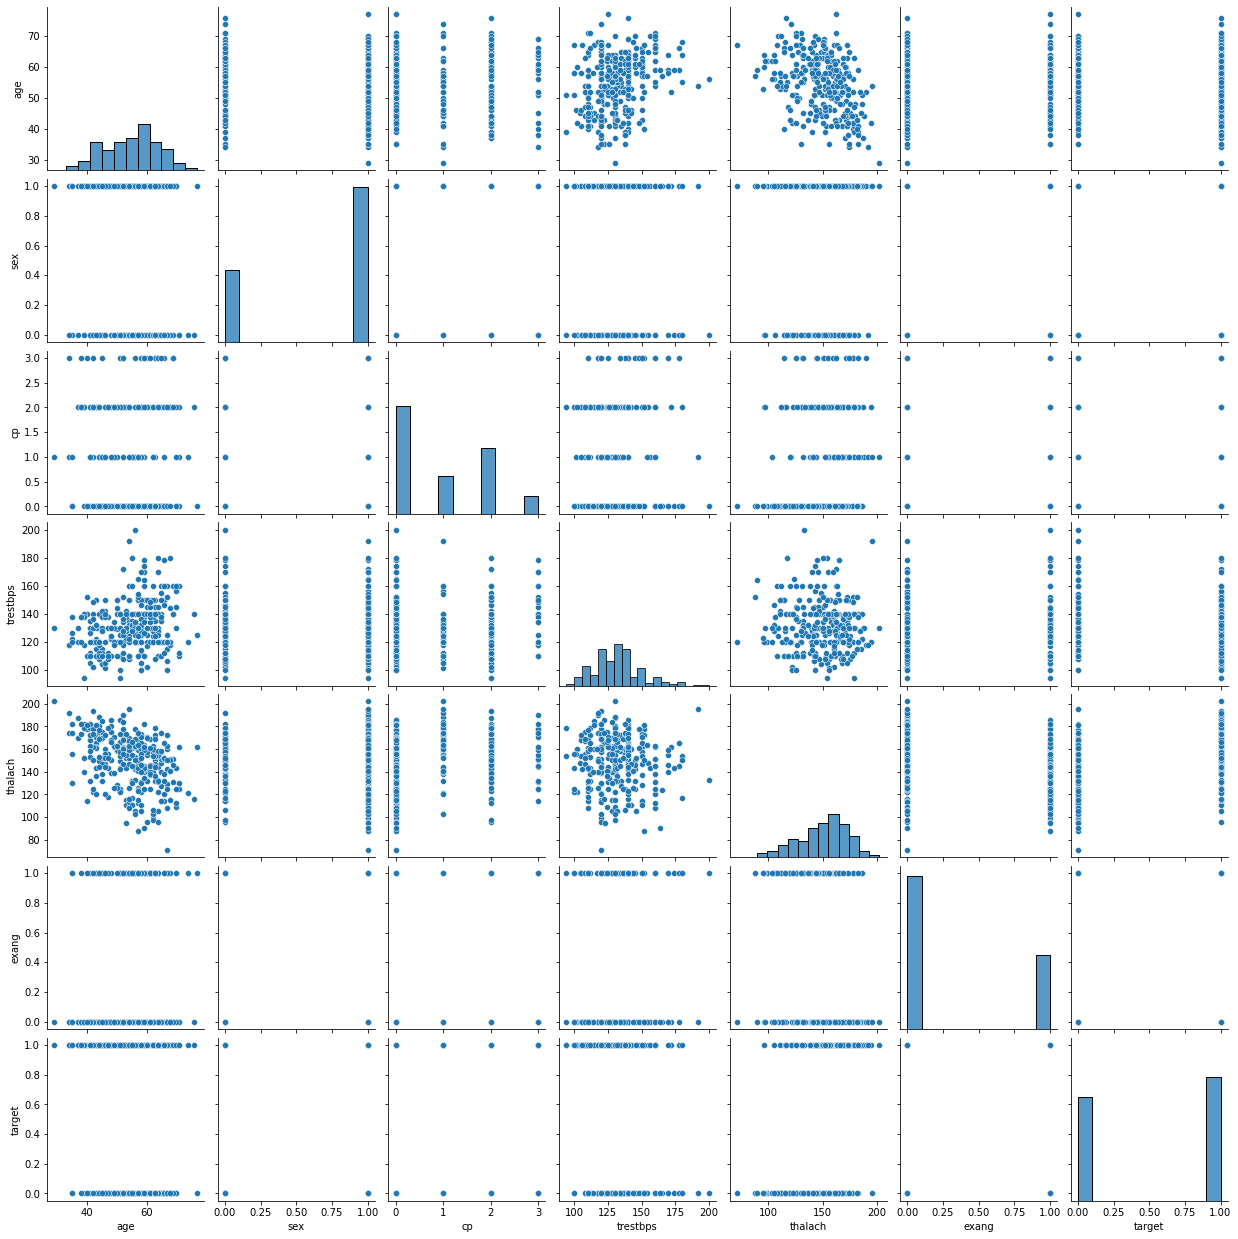

In [18]:
sns.pairplot(df)

## Feature Encoding

We can encode the categorical features so that they're ready to be used with our machine learning models.

In [19]:
# One hot encode the categorical columns
df_sex_one_hot = pd.get_dummies(df_cat['sex'], prefix='sex')
df_cp_one_hot = pd.get_dummies(df_cat['cp'], prefix='cp')
df_exang_one_hot = pd.get_dummies(df_cat['exang'], prefix='exang')

In [20]:
df_enc = pd.concat([df_cat, df_sex_one_hot, df_cp_one_hot, df_exang_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_enc = df_enc.drop(['sex', 'cp', 'exang'], axis=1)

In [21]:
df_enc.head()

,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,exang_0,exang_1
0,0,1,0,0,0,1,1,0
1,0,1,0,0,1,0,1,0
2,1,0,0,1,0,0,1,0
3,0,1,0,1,0,0,1,0
4,1,0,1,0,0,0,0,1


## Feature Scaling

We will perform standardization to avoid bias of a certain feature when we test different of models especially distance-based classifiers such as k-Nearest Neigbours, Logistic regression, Support Vector Machine and so on.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_num_transform = scaler.fit_transform(df_num)
df_num_transform = pd.DataFrame(df_num_transform, columns = df_num.columns)
df_num_transform.head()

,age,trestbps,thalach
0,0.952197,0.763956,0.015443
1,-1.915313,-0.092738,1.633471
2,-1.474158,-0.092738,0.977514
3,0.180175,-0.663867,1.239897
4,0.290464,-0.663867,0.583939


In [23]:
X_transform = pd.concat([df_num_transform, df_enc], axis=1)# data
y = df.target # labels
X_transform.head()

,age,trestbps,thalach,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,exang_0,exang_1
0,0.952197,0.763956,0.015443,0,1,0,0,0,1,1,0
1,-1.915313,-0.092738,1.633471,0,1,0,0,1,0,1,0
2,-1.474158,-0.092738,0.977514,1,0,0,1,0,0,1,0
3,0.180175,-0.663867,1.239897,0,1,0,1,0,0,1,0
4,0.290464,-0.663867,0.583939,1,0,1,0,0,0,0,1


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

## Data Spilting

We split the dataset into training set and test set. For the spilting ratio, what I normally do is see the size of the dataset. If the dataset is relatively small (n < 10000), 70:30 would be a suitable choice. If the dataset is relatively large, say n > 10000, then choose 80:20. In this case, we have 1055 instances, so we choose to split the dataset into 70% for training and 30% for testing.

In [25]:
from sklearn.model_selection import train_test_split

seed_num = 10
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.3, random_state=seed_num)

print(X_train.shape)
print(X_test.shape)

(212, 11)
(91, 11)


## Basic Model Building(Baseline Validation Performance)

Before going further, I like to see how various different models perform with default parameters. I tried the following models using 10 fold cross validation to get a baseline. With a validation set basline, we can see how much tuning improves each of the models. Just because a model has a high basline on this validation set doesn't mean that it will actually do better on the eventual test set. Also, the performance metrics that I use in this project is Recall since . Then, we will pick 6 best basic models to tune them later on.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

In [27]:
lr = LogisticRegression(random_state=seed_num, n_jobs=-1)
knn = KNeighborsClassifier(n_jobs=-1)
dt = DecisionTreeClassifier(random_state=seed_num)
etc = ExtraTreeClassifier(random_state = seed_num)
svc = SVC(probability=True, random_state=seed_num)
gnb = GaussianNB()
gpc = GaussianProcessClassifier(random_state=seed_num, n_jobs=-1)
mlp = MLPClassifier(random_state=seed_num)
rf = RandomForestClassifier(random_state=seed_num, n_jobs=-1)
etsc = ExtraTreesClassifier(random_state=seed_num, n_jobs=-1)
gbc = GradientBoostingClassifier(random_state=seed_num)
ada = AdaBoostClassifier(random_state=seed_num)
bag = BaggingClassifier(random_state=seed_num, n_jobs=-1)
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
xgb = XGBClassifier(random_state=seed_num)

In [28]:
from sklearn.ensemble import VotingClassifier
vot = VotingClassifier(estimators = [('lr',lr),('knn',knn),('dt',dt),('etc',etc),('svc',svc),('gnb',gnb),('gpc',gpc),('mlp',mlp),('rf',rf),('etsc',etsc),('gbc',gbc),('ada',ada),('bag',bag),('lda',lda),('qda',qda),('xgb',xgb)], voting = 'soft', n_jobs=-1)

In [29]:
from sklearn.model_selection import cross_val_score

def get_cv_score(algo, X_train, y_train):
    
    model = algo.fit(X_train, y_train)
    cv = cross_val_score(model, X_train, y_train, cv=10, scoring='recall', n_jobs=-1)
    score = cv.mean()
    
    return score

In [30]:
# Initialize the data frame for stroring the performance of all models later on
column_names = ['Models', 'Recall']
basic_models_scores = pd.DataFrame(columns = column_names)

In [31]:
basic_model = [lr, knn, dt, etc, svc, gnb, gpc, mlp, rf, etsc, gbc, ada, bag, xgb, lda, qda, vot]
model_name = [
                'Logistic Regression', 
                'k-Nearest Neighbors',
                'Decision Tree', 
                'Extra Tree Classifier',
                'Support Vector Classifier', 
                'Gaussian Naive Bayes',
                'Gaussian Process Classifier',
                'Multi-layer Perceptron Classifier',
                'Random Forest', 
                'Extra Trees Classifier',
                'Gradient Boosting Classifier',
                'Ada Boost Classifier',
                'Bagging Classifier',
                'Extreme Gradient Boosting',
                'Linear Discriminant Analysis',
                'Quadratic Discriminant Analysis',
                'Voting Classifier'
             ]

i=0
for m in basic_model:
    scores = [get_cv_score(m, X_train, y_train)]
    basic_models_scores.loc[i+1] = [model_name[i]] + scores
    i+=1

[23:53:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [32]:
basic_models_scores.sort_values(by='Recall', ascending=False)

,Models,Recall
8,Multi-layer Perceptron Classifier,0.878205
5,Support Vector Classifier,0.870513
1,Logistic Regression,0.854487
17,Voting Classifier,0.854487
7,Gaussian Process Classifier,0.846154
16,Quadratic Discriminant Analysis,0.846154
9,Random Forest,0.846154
10,Extra Trees Classifier,0.830128
15,Linear Discriminant Analysis,0.829487
11,Gradient Boosting Classifier,0.822436


Looks like the top 6 models are Support Vector Classifier, Logistic Regression, Linear Discriminant Analysis, Extreme Gradient Boosting, Voting Classifier and Random Forest.

## Model Tuning

After getting the baselines, let's see if we can improve on the indivdual model results. I have used grid search to tune the models.

In [33]:
from sklearn.model_selection import GridSearchCV

### Multi-layer Perceptron Classifier	

In [34]:
param_grid =  {
               'hidden_layer_sizes': [100, 50, 150],
               'alpha': [0.0001, 0.001, 0.00001],
               'tol': [1e-4, 1e-3, 1e-5],
               'batch_size': [128, 64],
              }
                                  
clf_mlp = GridSearchCV(mlp, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring ='recall')
best_clf_mlp = clf_mlp.fit(X_train, y_train)
best_mlp = best_clf_mlp.best_estimator_
best_clf_mlp.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'alpha': 0.0001, 'batch_size': 128, 'hidden_layer_sizes': 100, 'tol': 0.0001}

### Support Vector Classifier

In [35]:
param_grid =  {'C': [1, 0.1, 0.075],
               'kernel': ['rbf','linear','sigmoid'],
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False],
               'tol': [1e-3, 1e-4, 1e-2],
              }

clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring ='recall')
best_clf_svc = clf_svc.fit(X_train, y_train)
best_svc = best_clf_svc.best_estimator_
best_clf_svc.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'C': 0.075,
 'gamma': 'scale',
 'kernel': 'rbf',
 'shrinking': True,
 'tol': 0.001}

### Logistic Regression

In [36]:
param_grid = {'penalty' : ['l2', 'l1', 'elasticnet'],
              'tol': [1e-4, 1e-5, 1e-3],
              'C' : [1, 0.5, 0.05],
              'max_iter' : [100, 50, 200],
              'solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg']
             }

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring ='recall')
best_clf_lr = clf_lr.fit(X_train, y_train)
best_lr = best_clf_lr.best_estimator_
best_clf_lr.best_params_

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


{'C': 0.05, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001}

### Gaussian Process Classifier

In [37]:
param_grid =  {'max_iter_predict': [100, 50, 200],  
               'warm_start': [False, True],
               'copy_X_train': [True, False],
               'multi_class': ['one_vs_rest', 'one_vs_one']
              }
clf_gpc = GridSearchCV(gpc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring ='recall')
best_clf_gpc = clf_gpc.fit(X_train, y_train)
best_gpc = best_clf_gpc.best_estimator_
best_clf_gpc.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'copy_X_train': True,
 'max_iter_predict': 100,
 'multi_class': 'one_vs_rest',
 'warm_start': False}

### Quadratic Discriminant Analysis	

In [38]:
param_grid =  {
               'tol': [1e-4, 1e-3, 1e-5],
               'reg_param':[0, 0.1, 0.2, 0.3, 0.4, 0.5],
               'store_covariance': [False,True]
              }

clf_qda = GridSearchCV(qda, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring ='recall')
best_clf_qda = clf_qda.fit(X_train, y_train)
best_qda = best_clf_qda.best_estimator_
best_clf_qda.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'reg_param': 0.5, 'store_covariance': False, 'tol': 0.0001}

### Voting Classifier

To tune the voting classifier, I decided to evaluate the performance of the tuned models first, then we give extra weights to the models that performed better.

In [39]:
tuned_models_scores = pd.DataFrame(columns = ['Models', 'Recall'])

In [40]:
tuned_model = [best_mlp, best_svc, best_lr, best_gpc, best_qda]
tuned_model_name = [
                    'Multi-layer Perceptron Classifier',
                    'Support Vector Classifier',
                    'Logistic Regression', 
                    'Gaussian Process Classifier',
                    'Quadratic Discriminant Analysis',
                    'Voting Classifier'               
                    ]

i=0
for m in tuned_model:
    scores = [get_cv_score(m, X_train, y_train)]
    tuned_models_scores.loc[i+1] = [tuned_model_name[i]] + scores
    i+=1

In [41]:
tuned_models_scores.sort_values(by='Recall', ascending=False)

,Models,Recall
2,Support Vector Classifier,0.951282
3,Logistic Regression,0.896795
1,Multi-layer Perceptron Classifier,0.869872
4,Gaussian Process Classifier,0.846154
5,Quadratic Discriminant Analysis,0.830128


In [42]:
vot = VotingClassifier(estimators = [('svc',best_svc), ('lr',best_lr), ('mlp',best_mlp), ('gpc',best_gpc), ('qda',best_qda)], voting='soft', n_jobs=-1)
params = {'weights' : [ [1,1,1,1,1],
                        [2,1,1,1,1],
                        [3,2,1,1,1],
                        [4,3,2,1,1],
                        [5,4,3,2,1]
                      ]
          }

clf_vot = GridSearchCV(vot, param_grid = params, cv = 5, verbose = True, n_jobs = -1, scoring ='recall')
best_clf_vot = clf_vot.fit(X_train, y_train)
best_vot = best_clf_vot.best_estimator_
best_clf_vot.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'weights': [5, 4, 3, 2, 1]}

In [43]:
scores = [get_cv_score(best_vot, X_train, y_train)]
tuned_models_scores.loc[5+1] = [tuned_model_name[5]] + scores
tuned_models_scores.sort_values(by='Recall', ascending=False)

,Models,Recall
2,Support Vector Classifier,0.951282
3,Logistic Regression,0.896795
1,Multi-layer Perceptron Classifier,0.869872
4,Gaussian Process Classifier,0.846154
6,Voting Classifier,0.839103
5,Quadratic Discriminant Analysis,0.830128


## Model Selection

For model selection phase, we will choose the best model by selecting the model woth the higest recall score. This is because Recall is not so much about capturing cases correctly but more about capturing all cases that really have heart disease in actual case.

In [44]:
from sklearn import metrics

def get_performance(algo, X_train, y_train, X_test, y_test):
    
    model = algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    
    row = [accuracy, precision, recall, f1, auc]
    return row

In [45]:
tuned_models_performance = pd.DataFrame(columns = ['Models', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'ROC AUC'])

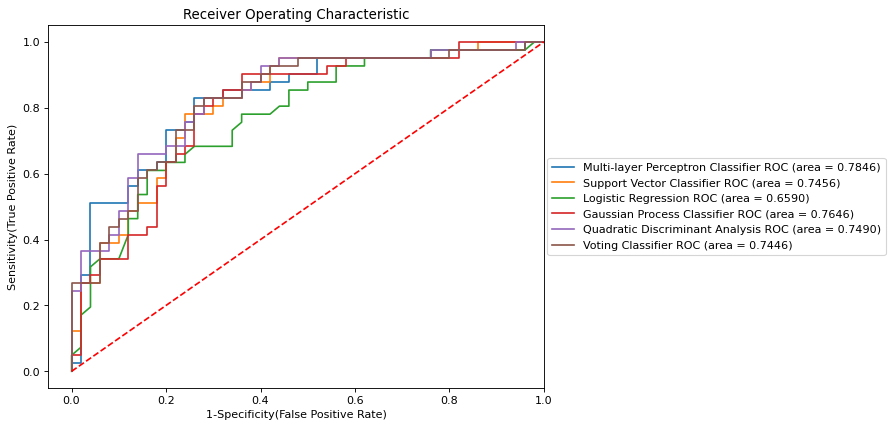

In [46]:
tuned_model = [best_mlp, best_svc, best_lr, best_gpc, best_qda, best_vot]
plt.figure(figsize=(8, 6), dpi=80)

i=0
for m in tuned_model:
    
    scores = get_performance(m, X_train, y_train, X_test, y_test)
    tuned_models_performance.loc[i+1] = [tuned_model_name[i]] + scores
    
    y_pred = m.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, m.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test, m.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.4f)' % (tuned_model_name[i], auc))
    i+=1
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="center right", bbox_to_anchor=(1.7, 0.50))
plt.show()   # Display

In [47]:
tuned_models_performance.sort_values(by='Recall', ascending=False)

,Models,Accuracy,Precision,Recall,F1 score,ROC AUC
2,Support Vector Classifier,0.725275,0.629032,0.951220,0.757282,0.745610
3,Logistic Regression,0.637363,0.562500,0.878049,0.685714,0.659024
5,Quadratic Discriminant Analysis,0.736264,0.654545,0.878049,0.750000,0.749024
1,Multi-layer Perceptron Classifier,0.780220,0.723404,0.829268,0.772727,0.784634
4,Gaussian Process Classifier,0.758242,0.693878,0.829268,0.755556,0.764634
6,Voting Classifier,0.736264,0.666667,0.829268,0.739130,0.744634


As we can see, Support Vector Classifier scored with the highest Recall score approximately 0.95 which means that 95% of the actual heart disease patient can be detected by using these model. Also, 72.5% of accuracy is also quite acceptable. This means that roughly 7 out of 10 people will be predicted correctly.

In [48]:
best_model = best_svc

## Feature Importance

Now, we can see which features are the most 'important' for this prediction based on the tuned Random Forest model.

<AxesSubplot:xlabel='feature'>

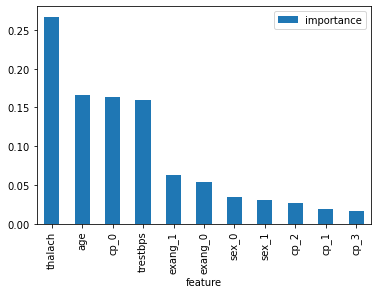

In [49]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

As we can see, thalach(maximum heart rate achieved) is the most significant feature to predict heart disease.

## Data Pickling

In [50]:
import pickle
pickle.dump(best_model, open('heart_model.pkl','wb'))

In [55]:
df_num.to_csv('Datasets/numerical_data.csv',index=False)